In [5]:
import os
import nltk
import gensim
import pandas as pd

In [6]:
#wd = os.getcwd()
#os.listdir(wd)

In [116]:
test = {'flag1':[0],'flag2':[0],'flag3':[0],'flag4':[1]}

In [117]:
df = pd.DataFrame(test)

In [118]:
df['test']= (df.iloc[0].sum() < 2)

In [119]:
df['test']

0    True
Name: test, dtype: bool

In [120]:
int(df['test'])

1

## Text Analysis with NLTK and gensim
* [Tokenization: Sentence and Words](#token)
* [Stopwords](#stop)
* [Stemming and Lemmatization](#stem)
* [Part of Speech Tagging](#pos)
* [Doc2Vec](#doc2vec)
* [LDA](#lda)

### Tokenization: Sentence and Words <a id='token' > </a>

In [207]:
# Text analysis with NLTK
# Breaking down a paragraph of text into smaller parts such as sentences or words is called Tokenization

from nltk.tokenize import sent_tokenize, word_tokenize

sample_text = """Hello Mr. Smith, how are you doing today? The weather is phenomenal, and the city is awesome.
 The sky is pinkish-blue. You shouldn't eat cardboard"""

In [208]:
#Sentence Tokenization
tokenized_text = sent_tokenize(sample_text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is phenomenal, and the city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [209]:
#Word Tokenization
tokenized_word = word_tokenize(sample_text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'phenomenal', ',', 'and', 'the', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


Most common words in corpus:  [('is', 3), (',', 2), ('The', 2)]


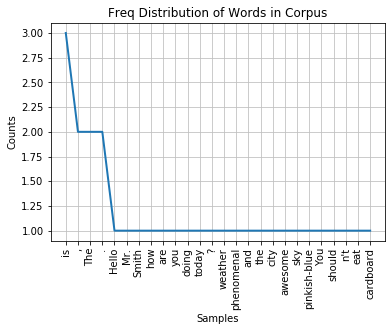

In [219]:
# Frequency Distribution
from nltk import FreqDist
fdist = FreqDist(tokenized_word)

print('Most common words in corpus: ',fdist.most_common(3))

import matplotlib.pyplot as plt
plt.title('Freq Distribution of Words in Corpus')
fdist.plot(30, cumulative = False)
plt.show()

### Stopwords <a id='stop' > </a>

In [222]:
# Stopwords 
# Need to create a list of stopwords and filter out the stopwords in your text, NLTK has it's own
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
print('Stop words in NLTK English corpus: \n',stop_words)

Stop words in NLTK English corpus: 
 {"that'll", 'd', 'just', 'its', "haven't", 'don', 'having', 'whom', 'wasn', 'm', 'while', 'myself', 'about', 'mightn', 'does', 'how', 'through', 'from', 'yourselves', 'below', 'where', 'ma', 'after', 'as', 'under', 'll', 'being', 'off', 'then', 'any', 'only', 'a', 'over', 'an', 'she', 've', 'we', 'herself', 'why', "doesn't", 'each', 'by', "don't", 'with', 'against', "you'd", 'do', 'for', 'ain', "you're", 'between', 'what', "hasn't", "weren't", 's', 'was', 'few', 'aren', "needn't", 'there', "won't", 'once', 'will', 'which', 'some', 'than', 'above', 'are', 'itself', "couldn't", 'should', 'am', 'shan', "shan't", 'now', 'those', 'doesn', 'that', 'did', 'again', 'haven', 'ours', 'down', 'own', 'her', 'their', 'shouldn', "shouldn't", "she's", 'be', 'very', 'of', 'in', 'himself', 'this', 'hasn', 'them', 'if', "wouldn't", 'these', 'theirs', "you'll", 'didn', "wasn't", 'my', 'not', 'or', "hadn't", 'other', 'same', 'nor', 'out', 'our', 'until', 'here', 'needn

In [235]:
#Filtering out stopwords from tokenized text
filtered_sent = []
for word in tokenized_word:
    if word not in stop_words:
        filtered_sent.append(word)

        
print("Original Tokenized Text before removing stopwords: \n", tokenized_word)
print('\n---------------------------------------\n')
print("Stopwords removed: \n", filtered_sent)

Original Tokenized Text before removing stopwords: 
 ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'phenomenal', ',', 'and', 'the', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']

---------------------------------------

Stopwords removed: 
 ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'phenomenal', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']


### Stemming and Lemmatization <a id='stem' > </a>

In [240]:
#Lexicon Normalization
#stemming and lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Original Word:", word)
print("Lemmatized Word:", lem.lemmatize(word, 'v'))
print("Stemmed Word:", stem.stem(word))

Original Word: flying
Lemmatized Word: fly
Stemmed Word: fli


In [243]:
# Stem words in our sample text 
from nltk.stem import PorterStemmer

stemmed_words = []
for w in filtered_sent:
    stemmed_words.append(PorterStemmer().stem(w))
            
print("Filtered Sentence with no stopwords: \n", filtered_sent,'\n')
print("Stemmed Sentence: \n", stemmed_words)

Filtered Sentence with no stopwords: 
 ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'phenomenal', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard'] 

Stemmed Sentence: 
 ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'phenomen', ',', 'citi', 'awesom', '.', 'the', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard']


### Part of Speech Tagging <a id='pos' > </a>

In [250]:
#Part of Speech Tagging
#sample = 'Jeff Smith was born in Ulm, Germany in 1879'

#tokens = nltk.word_tokenize(sample)
#print('Tokens in sentence: ',tokens)

print('\nTokens and their part of speech: ')
nltk.pos_tag(tokens)
nltk.pos_tag(stemmed_words)


Tokens and their part of speech: 


[('hello', 'NN'),
 ('mr.', 'NN'),
 ('smith', 'NN'),
 (',', ','),
 ('today', 'NN'),
 ('?', '.'),
 ('the', 'DT'),
 ('weather', 'NN'),
 ('phenomen', 'NNS'),
 (',', ','),
 ('citi', 'NN'),
 ('awesom', 'NN'),
 ('.', '.'),
 ('the', 'DT'),
 ('sky', 'JJ'),
 ('pinkish-blu', 'NN'),
 ('.', '.'),
 ('you', 'PRP'),
 ("n't", 'RB'),
 ('eat', 'VB'),
 ('cardboard', 'NN')]

### Doc2Vec <a id='doc2vec' > </a>

In [251]:
#NLP with Gensim/Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [259]:
#More Fake Text Data
text_corpus = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

data = ['I love machine learning. Its so cool',
       "I love coding in python",
       'I love building chatbots',
       'they chat amazingly well']

In [255]:
# Taking observations from dataframe and putting into doc2vec format

# Create df
import pandas as pd
df = pd.DataFrame(
    [p] for p in text_corpus
)

# Convert df to list
# Create an empty list 
row_list =[] 
  
# Iterate over each row 
for index,rows in df.iterrows(): 
    # Create list for the current row 
    my_list = rows[0] 
      
    # append the list to the final list 
    row_list.append(my_list) 

#print the list
print(row_list) 

['Human machine interface for lab abc computer applications', 'A survey of user opinion of computer system response time', 'The EPS user interface management system', 'System and human system engineering testing of EPS', 'Relation of user perceived response time to error measurement', 'The generation of random binary unordered trees', 'The intersection graph of paths in trees', 'Graph minors IV Widths of trees and well quasi ordering', 'Graph minors A survey']


In [262]:
#Removing stopwords provided by NLTK (shown above)
filtered_list = [[word for word in document.lower().split() if word not in stop_words] for document in row_list]

In [263]:
#Tokenize sentences with tags for each document for training with Doc2Vec (text_corpus data)
tagged_list = [TaggedDocument(words = filtered_list[i], tags = [str(i)]) for i, _d in enumerate(filtered_list)]

In [269]:
#Tagging the data for training with Doc2Vec (data)
tagged_data = [TaggedDocument(words = word_tokenize(_d.lower()), tags = [str(i)]) for i, _d in enumerate(data)]

In [272]:
#Variables for control
max_epochs = 100
vec_size = 20
alpha = 0.025

#Doc2Vec model
model = Doc2Vec(vector_size=vec_size,
               alpha=alpha,
               min_alpha = 0.00025,
               min_count = 1,
               dm = 1) #dm defines training algorithm. dm=1 means distributed memory and dm=0 means distributed
                       #bag of words. Distributed Memory model preserves the word order and Bag of Words does not

#Building model vocabulary based on training data
model.build_vocab(tagged_list)

In [273]:
#Training model
for epoch in range(max_epochs):
    print('iteration {}'.format(epoch))
    model.train(tagged_list,
               total_examples=model.corpus_count,
                epochs=model.iter)
    #decrease learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save('d2v_test.model')
print('------------',"\nModel Saved")
#Notes: dm defines the training algorithm. dm=1

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30


/Users/tylerlewris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteration 78
iteration 79
iteration 80
iteration 81
iteration 82
iteration 83
iteration 84
iteration 85
iteration 86
iteration 87
iteration 88
iteration 89
iteration 90
iteration 91
iteration 92
iteration 93
iteration 94
iteration 95
iteration 96
iteration 97
iteration 98
iteration 99
------------ 
Model Saved


Below we are loading the trained model and finding documents most similar to new data

In [307]:
# Loading the model
model = Doc2Vec.load('d2v_test.model')

#Find vector of a document most similar to new data point
test_data = word_tokenize('I love chatbots so much'.lower())
v1 = model.infer_vector(test_data)
print('Vector of document most similar to new data point: \n',
      v1,'\n')

#Find top tag matches based on new data point
new_vector = model.infer_vector(test_data)      #NOTE: must use infer_vector on new data point to retrieve sim tags
sims = model.docvecs.most_similar([new_vector]) 
print('Top Tag matches based on new data point: \n', sims,'\n')

#Find most similar document using tags
similar_doc = model.docvecs.most_similar('2') #finding most similar document to tag = 1
print('Most similar document to tag 2: \n' , 
      similar_doc,'\n')

#To find vector of doc in training data using tags
print('Vector of document from training data with tag = 1 \n',
      model.docvecs['1'])

Vector of document most similar to new data point: 
 [ 0.00144816 -0.0220431   0.00230109 -0.00586921  0.00265618 -0.02065248
 -0.00486062 -0.01064788 -0.02447778 -0.0061126  -0.00162427  0.00177816
 -0.01270492 -0.00167742  0.02104566 -0.01411982  0.01155152  0.02064102
 -0.006814    0.01051914] 

Top Tag matches based on new data point: 
 [('0', 0.37790510058403015), ('7', 0.37467435002326965), ('3', 0.37404441833496094), ('8', 0.36683574318885803), ('5', 0.36443600058555603), ('2', 0.36180442571640015), ('1', 0.35243597626686096), ('6', 0.3199179172515869), ('4', 0.3028177320957184)] 

Most similar document to tag 2: 
 [('3', 0.9938420057296753), ('1', 0.987184464931488), ('4', 0.9862078428268433), ('0', 0.9850899577140808), ('5', 0.9813613295555115), ('6', 0.9791783094406128), ('8', 0.9777603149414062), ('7', 0.9705914258956909)] 

Vector of document from training data with tag = 1 
 [-0.18764363 -1.1816138   0.4524767   0.6221697  -0.4830281   0.07238834
  0.00818319  0.41751418 -

### LDA  <a id='lda' > </a>

In [ ]:
# LDA is based on probabilistic graphical modeling. The algorithm takes a bag of words matrix as input, then
# produces 2 smaller matrices; a document to topic matrix and a word to topic matrix that when multiplied together
# reproduce the bag of words matrix with the lowest error.

In [2]:
#For this example, grabbing a large dataset from sklearn
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

#### Data Preprocessing

In [74]:
# Convert to list
#data = df.content.values.tolist()

import re
data = documents[:100]

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

In [133]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

porter=PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [81]:
stemmed_list = []
for line in data:
    stem_sentence=stemSentence(line)
    stemmed_list.append(stem_sentence)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#setting number of features = 1000
num_features = 50000

# NMF (Non Negative Matrix Factorization) is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(stemmed_list)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')
tf = tf_vectorizer.fit_transform(stemmed_list)
tf_feature_names = tf_vectorizer.get_feature_names()

In [103]:
# Materialize the sparse data
data_dense = tf.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  3.870095902353967 %


In [83]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

#number of topics
num_topics = 10

# Run NMF on tfidf vector (sparse matrix with all rows and 1000 columns)
nmf = NMF(n_components=num_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA on tf vector (sparse matrix with all rows and 1000 columns)
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


In [107]:
# See model parameters
lda.get_params

<bound method BaseEstimator.get_params of LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)>

In [84]:
# Display and Evaluate topics

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print('\nTopic %d:' % (topic_idx+1))
        print( " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)
print('\n##################################\n')
display_topics(lda, tf_feature_names, no_top_words)


Topic 1:
wa sin old initi stay mari wonder did somewher appear

Topic 2:
key chip session receiv phone possibl door messag encrypt user

Topic 3:
thi say like time exist ani use just know doe

Topic 4:
israel isra soldier death peac realiz polici occup report attack

Topic 5:
vram simm 256k slot board need distributor solder favorit expans

Topic 6:
memori song pointer 49 folk serv goe copi watch hr

Topic 7:
jim economi indic industri central strike market imagin govern control

Topic 8:
condit alot guid rid sell price 30 basebal want card

Topic 9:
cach card 32k simm set iisi gl vi uu doe

Topic 10:
game playoff pen lose shot regular season definit let rememb

##################################


Topic 1:
mm wa bike metal littl time cours power ha turn

Topic 2:
confer paper applic need june run chip jim accept construct

Topic 3:
thi use govern time wa ani day peopl onli israel

Topic 4:
thi creation hole onli exist say ha vram moral forc

Topic 5:
work thi certain tri ha like ani 

In [99]:
lda_score = lda.score(tf)
perplexity_score = lda.perplexity(tf)
print("LDA Score: {a: 5f}\nPerplexity Score: {b: 2f}".format(a=lda.score(tf), b=lda.perplexity(tf)))

LDA Score: -66313.515067
Perplexity Score:  3796.363975


### Grid Search Optimal Parameters for LDA

In [111]:
from sklearn.model_selection import GridSearchCV
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(tf)

/Users/tylerlewris/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/tylerlewris/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                   

In [ ]:
#This process is important but is not the end.

In [113]:
### Best Topic Model and its Parameters

# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tf))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}
Best Log Likelihood Score:  -26762.41775589945
Model Perplexity:  826.1579830686579


In [119]:
import pandas as pd
import numpy as np

In [120]:
### Dominant Topic in each Document - find the topic that dominates the documents
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(tf)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0,0,0.17,0.1,0.14,0,0,0.48,0,0.11,7
Doc1,0,0,0,0,0,0,0,0.98,0,0,7
Doc2,0,0,0,0,0,0,0.98,0,0,0,6
Doc3,0,0,0,0.17,0,0,0.31,0.51,0,0,7
Doc4,0.96,0,0,0,0,0,0,0,0,0,0
Doc5,0.01,0.01,0.01,0.01,0.95,0.01,0.01,0.01,0.01,0.01,4
Doc6,0,0,0,0,0,0,0,0.99,0,0,7
Doc7,0,0,0.23,0,0,0,0,0.43,0.33,0,7
Doc8,0,0,0,0,0,0,0,0,0,0.97,9
Doc9,0.99,0,0,0,0,0,0,0,0,0,0


In [140]:
### Review Topic Distributions across documents
#How many documents are in each topic?
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,7,17
1,0,16
2,6,13
3,2,12
4,9,10
5,4,9
6,3,9
7,1,8
8,8,4
9,5,2


### Data Exploration

In [108]:
d = {'Fun Events': ['Swimming', 'Tennis','Tennis','Tennis','Biking','Swimming'], 'Location': ['Texas', 'California', 'California','New York','Wyoming','Virginia'], 'Gender': ['Male','Female','Male','Male','Male','Male']}

In [109]:
fun_df = pd.DataFrame(data=d)

In [110]:
fun_df

,Fun Events,Location,Gender
0,Swimming,Texas,Male
1,Tennis,California,Female
2,Tennis,California,Male
3,Tennis,New York,Male
4,Biking,Wyoming,Male
5,Swimming,Virginia,Male


In [113]:
fun_df['Fun Events'].value_counts()

Tennis      3
Swimming    2
Biking      1
Name: Fun Events, dtype: int64

In [114]:
fun_df['Location'].value_counts()

California    2
Texas         1
Wyoming       1
Virginia      1
New York      1
Name: Location, dtype: int64

In [115]:
fun_df[(fun_df['Fun Events'] == 'Tennis') & (fun_df['Location']== 'California')]

,Fun Events,Location,Gender
1,Tennis,California,Female
2,Tennis,California,Male


In [117]:
import seaborn as sns

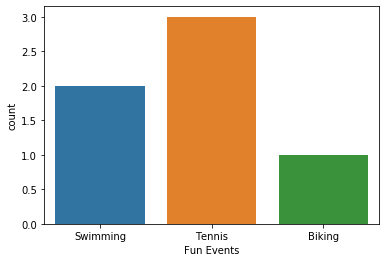

In [119]:
sns.countplot(fun_df['Fun Events']);

In [ ]:
#need to clean notebook

## Regular Expressions

In [19]:
import re
import pandas as pd

In [88]:
example_strings = ['This is a list of new things \n\n Here we are Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data. \n MAJOR IMPORTANT THINGS: \n Thing 1 is important \n Thing 2 is important \n thing 3 is also important \n MAJOR OTHER IMPORTANT THINGS: \n [1][2] Data science is related to data mining, deep learning and big data.',
                  'This is a list of new things \n\n Here we are Data science is an structural and unstructured data. \n\n MAJOR IMPORTANT THINGS: \n Thing 1 is important \n Thing 2 is important \n thing 3 is also important \n Thing four is definitely important \n   Thing five is good as well \n MAJOR OTHER IMPORTANT THINGS: \n [1][2] Data science is related to data mining, deep learning and big data.',
                  'Example of important string, \n MAJOR IMPORTANT THINGS: Blah BLAH \n\n thing 1 \n\n thing 2 \n MAJOR OTHER IMPORTANT THINGS:  ',
                   'test test']
example_df = pd.DataFrame(example_strings, columns=['text'])

In [21]:
print(example_strings[0])

This is a list of new things 

 Here we are Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data. 
 MAJOR IMPORTANT THINGS: 
 Thing 1 is important 
 Thing 2 is important 
 thing 3 is also important 
 MAJOR OTHER IMPORTANT THINGS: 
 [1][2] Data science is related to data mining, deep learning and big data.


In [26]:
print(example_df['text'].iloc[0])

This is a list of new things 

 Here we are Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data. 
 MAJOR IMPORTANT THINGS: 
 Thing 1 is important 
 Thing 2 is important 
 thing 3 is also important 
 MAJOR OTHER IMPORTANT THINGS: 
 [1][2] Data science is related to data mining, deep learning and big data.


In [121]:
#Count number of new lines appearing between two distinct string matches
num_events = []
for i in range(len(example_df)):
    message = example_df['text'].iloc[i]
    message = message.replace('\n\n', '\n')
    match_beg = re.search("(MAJOR IMPORTANT THINGS:)([\S\s]+)(MAJOR OTHER IMPORTANT THINGS:)", message)
    if (match_beg != None):
        match = match_beg.group(2).strip()
        match_number = match.count('\n')+1
        num_events.append(match_number)
    elif (match_beg == None):
        num_events.append(0)
    else:
        print('ERROR')

print(num_events)

[3, 5, 3, 0]


In [94]:
count=0
for i in example_df['text']:
    count= count+1
    print(count)
    print(i)

1
This is a list of new things 

 Here we are Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data. 
 MAJOR IMPORTANT THINGS: 
 Thing 1 is important 
 Thing 2 is important 
 thing 3 is also important 
 MAJOR OTHER IMPORTANT THINGS: 
 [1][2] Data science is related to data mining, deep learning and big data.
2
This is a list of new things 

 Here we are Data science is an structural and unstructured data. 

 MAJOR IMPORTANT THINGS: 
 Thing 1 is important 
 Thing 2 is important 
 thing 3 is also important 
 Thing four is definitely important 
   Thing five is good as well 
 MAJOR OTHER IMPORTANT THINGS: 
 [1][2] Data science is related to data mining, deep learning and big data.
3
Example of important string, 
 MAJOR IMPORTANT THINGS: Blah BLAH 

 thing 1 

 thing 2 
 MAJOR OTHER IMPORTANT THINGS:  
4
test test
